# Analyze Text Data with Yellowbrick

In [1]:
from yellowbrick.datasets import load_hobbies

/Users/elizabethlorelei/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load the Corpus

In [2]:
corpus = load_hobbies()

In [3]:
corpus.url

'https://s3.amazonaws.com/ddl-data-lake/yellowbrick/v1.0/hobbies.zip'

In [4]:
# corpus.data

### Vectorize the Documents

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
docs = vectorizer.fit_transform(corpus.data)
labels = corpus.target

In [6]:
docs.shape

(448, 20140)

### t-SNE: Clustering Similar Documents with Squared Euclidean Distance and Euclidean Distance

### L2 Squared Euclidean Distance

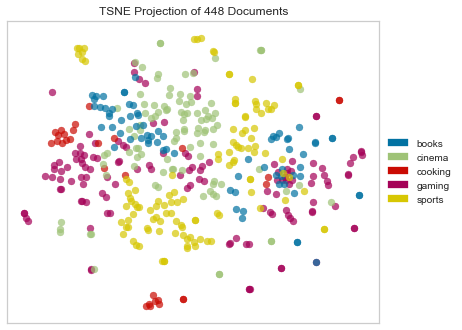

In [7]:
from yellowbrick.text import TSNEVisualizer

tsnse = TSNEVisualizer(size = (600, 400)) # L2 Squared Euclidean Distance
tsnse.fit(docs, labels)
tsnse.poof()

### Euclidean Distance

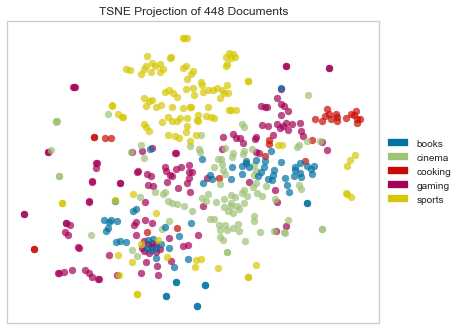

In [8]:
tsnse = TSNEVisualizer(size = (600, 400), metrics = "euclidean") # Euclidean Distance
tsnse.fit(docs, labels)
tsnse.poof()

### Manhattan ("Taxicub" or "Cityblock") Distance

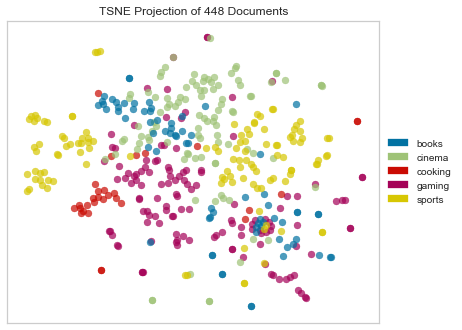

In [9]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "citycub")
tsne.fit(docs, labels)
tsne.poof()

### Bray Curtis Dissimilarity

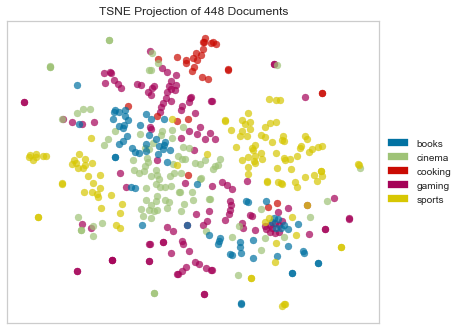

In [10]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "braycurtis")
tsne.fit(docs, labels).poof()

### Canberra Distance

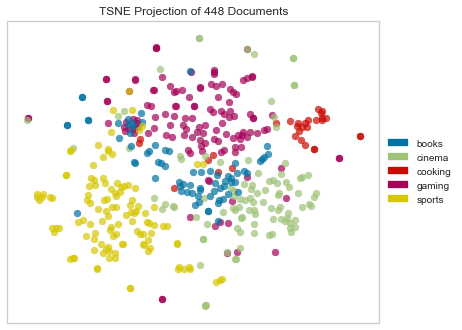

In [11]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "canberra")
tsne.fit(docs, labels).poof()

### Cosine Distance

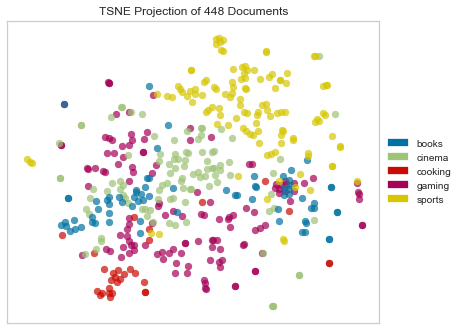

In [12]:
tsne = TSNEVisualizer(size = (600, 400), metrics = "cosine")
tsne.fit(docs, labels).poof()

### - Sokal-Michener dissimilarity 
### - Rogers-Tanimoto dissimilarity
### - Hamming distance

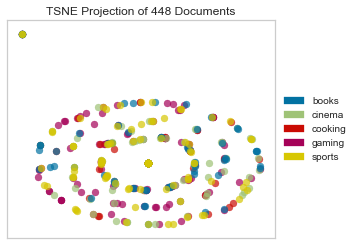

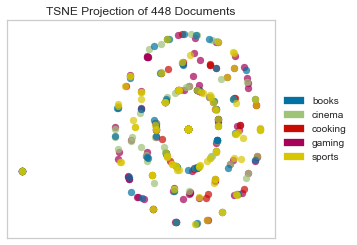

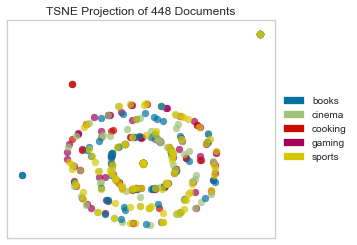

In [13]:
distance_functions = ["sokalmichener", "rogerstanimoto", "hamming"]
for metric in distance_functions:
    tsne = TSNEVisualizer(metric = metric)
    tsne.fit(docs, labels).poof()

### Omitting Class Labels - Using KMeans Clusterring

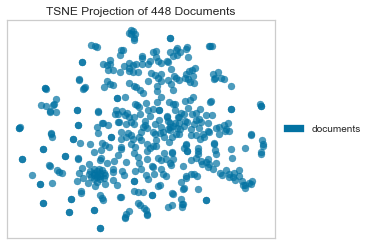

In [14]:
# Dont color points with their classes

tsne = TSNEVisualizer(labels = ["documents"])
tsne.fit(docs).poof()

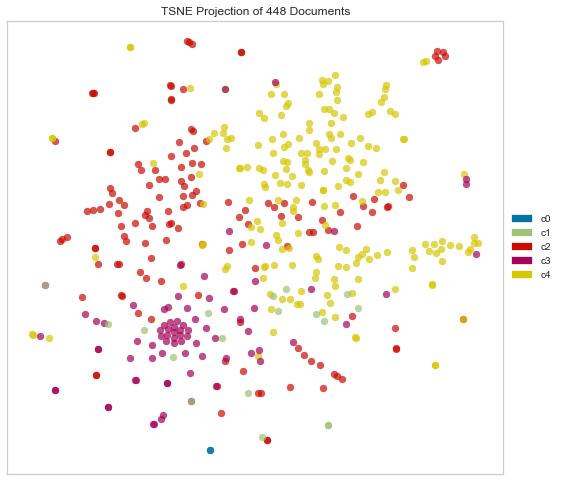

In [16]:
# Apply clustering instead of class names

from sklearn.cluster import KMeans

clusters = KMeans(n_clusters = 5)
clusters.fit(docs)

tsne = TSNEVisualizer(size = (800, 600))
tsne.make_transformer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof()